[INFO] loading network...


[INFO] classifying image
1/1 [==============================] - 0s 414ms/step
Top predictions:
1. mailbag - 51.59%
2. wallet - 21.96%
3. purse - 7.86%


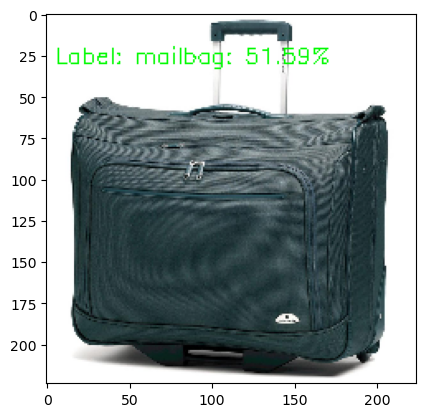

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.applications import VGG16
import cv2
import matplotlib.pyplot as plt

# Image classification page  

def read_image(uploaded_file):
    # Convert the file to an OpenCV compatible format
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    
    return image

def classify_image(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    print("[INFO] loading network...")
    model = VGG16(weights="imagenet")
    print("[INFO] classifying image")
    preds = model.predict(image)
    P = decode_predictions(preds)
    print("Top predictions:")
    for i, (imagenetID, label, prob) in enumerate(P[0]):
        print(f"{i+1}. {label} - {prob*100:.2f}%")
        if i == 2:
            break
    
    orig = read_image(open(image_path, 'rb'))
    orig = cv2.resize(orig, (224, 224))
    (imagenetID, Label, prob) = P[0][0]
    cv2.putText(orig, "Label: {}: {:.2f}%".format(Label, prob * 100),
                (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 250, 0), 1)
    orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    
    plt.imshow(orig_rgb)
    plt.show()
    
image_path = "C:\\Users\\MigLovis\\R.jpg"
classify_image(image_path)